In [119]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

In [120]:
print(torch.__version__)
print(torchvision.__version__)

2.7.1+cu126
0.22.1+cu126


In [121]:
#getting the dataset(FashionMNIST)
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

In [122]:
len(train_data), len(test_data)

(60000, 10000)

In [123]:
#see first training example
label,image = train_data[0]
print(f"Label: {label}")


Label: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [124]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [125]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

Text(0.5, 1.0, 'Ankle boot')

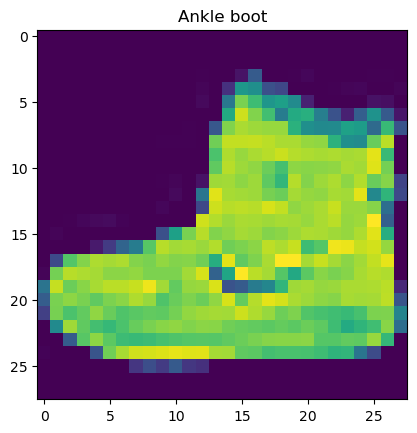

In [126]:
#visualizing the data
import matplotlib.pyplot as plt
image,label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])

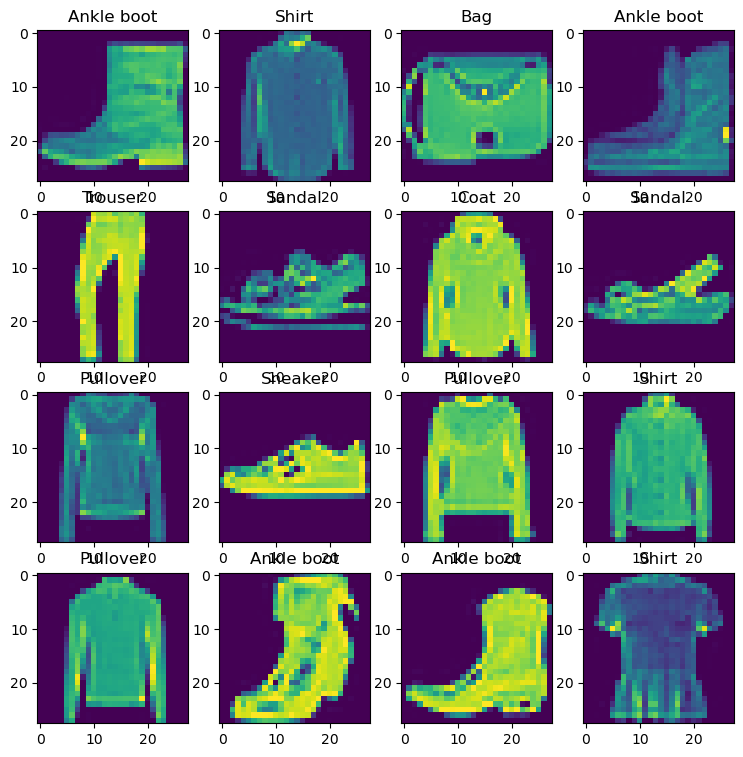

In [127]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,colums = 4,4
for i in range(1,rows*colums+1):
    rand_int = torch.randint(0,len(train_data),size=(1,)).item()
    img,label = train_data[rand_int]
    fig.add_subplot(rows,colums,i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])

In [128]:
#data loader and understand the batches
from torch.utils.data import DataLoader
train_loader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)
train_loader,test_loader


(<torch.utils.data.dataloader.DataLoader at 0x7f2ebe318510>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2ebe30fd10>)

In [129]:
len(train_data),len(train_loader),len(test_data),len(test_loader)

(60000, 1875, 10000, 313)

In [130]:
train_loader.batch_size,test_loader.batch_size

(32, 32)

In [131]:
#whats inside the data loader
train_batch,test_batch = next(iter(train_loader))
train_batch.shape,test_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [132]:
#create a baseline model of cv
flatten_model = nn.Flatten()
x = train_batch[0]
output = flatten_model(x)
output,output.shape

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
          0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.2863

In [133]:
class model1(nn.Module):
    def __init__(self,input_shape:int,hidden:int,output_shape:int):
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape,hidden),
            nn.Linear(hidden,output_shape)
            
        )
    def forward(self,x):
        return self.layerstack(x)

In [134]:
torch.manual_seed(42)
model = model1(
    input_shape=784,
    hidden=10,
    output_shape=len(class_names)
)
model


model1(
  (layerstack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [135]:
model.state_dict()

OrderedDict([('layerstack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layerstack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layerstack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.313

In [136]:
#setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [137]:
#creating a training loop and training a model on batch of data
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs =3
for epoch in tqdm(range(epochs)):
    print(f"epoch:{epoch}\n---")
    train_loss = 0
    
    #add a loop to loop through the training batches
    for batch,(x,y) in enumerate(train_loader):
        model.train()
        y_pred = model(x)
        loss_val = loss_fn(y_pred, y)  # use `loss_fn` or your actual loss function name
        train_loss += loss_val.item()
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

      
        
        
        if batch % 400 == 0:
            print(f"looked at {batch*len(x)}/{len(train_loader.dataset)} samples..")
#divide train loss by length of train dataloader
            train_loss /=len(train_loader)
         #testing
            test_loss = 0
            model.eval()
            for xtest,ytest in test_loader:
                #forward pass
                test_pred = model(xtest)
                
                test_loss += loss_fn(test_pred,ytest)
                test_loss/=len(test_loader)
            print(f"train loss:{train_loss:.5f} | test loss:{test_loss:.5f}")
         

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
---
looked at 0/60000 samples..
train loss:0.00126 | test loss:0.00768
looked at 12800/60000 samples..
train loss:0.16834 | test loss:0.00123
looked at 25600/60000 samples..
train loss:0.12353 | test loss:0.00117
looked at 38400/60000 samples..
train loss:0.11649 | test loss:0.00114
looked at 51200/60000 samples..
train loss:0.10877 | test loss:0.00095


 33%|███▎      | 1/3 [00:07<00:14,  7.47s/it]

epoch:1
---
looked at 0/60000 samples..
train loss:0.00030 | test loss:0.00094
looked at 12800/60000 samples..
train loss:0.10207 | test loss:0.00099
looked at 25600/60000 samples..
train loss:0.10534 | test loss:0.00086
looked at 38400/60000 samples..
train loss:0.10260 | test loss:0.00110
looked at 51200/60000 samples..
train loss:0.09921 | test loss:0.00109


 67%|██████▋   | 2/3 [00:14<00:07,  7.49s/it]

epoch:2
---
looked at 0/60000 samples..
train loss:0.00022 | test loss:0.00105
looked at 12800/60000 samples..
train loss:0.09825 | test loss:0.00104
looked at 25600/60000 samples..
train loss:0.09852 | test loss:0.00133
looked at 38400/60000 samples..
train loss:0.09756 | test loss:0.00120
looked at 51200/60000 samples..
train loss:0.09894 | test loss:0.00093


100%|██████████| 3/3 [00:22<00:00,  7.51s/it]


In [138]:
#make prediction and get result 
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module
            ):
    loss = 0
    correct = 0
    total = 0
    model.eval()
    with torch.inference_mode():
        for x,y in data_loader:
            y_pred = model(x)
            
            loss += loss_fn(y_pred,y)
            loss /=len(data_loader)
            pred_classes = y_pred.argmax(dim=1)
            correct += (pred_classes == y).sum().item()
            total += y.size(0)
            accuracy = correct / total * 100
            
        return {
        "model name": model.__class__.__name__,
        "model loss": loss,
        "model accuracy (%)": accuracy
          }

model_result = eval_model(
    model=model,
    data_loader=test_loader,
    loss_fn=loss_fn
)
model_result

{'model name': 'model1',
 'model loss': tensor(0.0011),
 'model accuracy (%)': 83.26}

In [139]:
torch.cuda.is_available()

True

In [140]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [141]:
#built a  better model using non linearity
class model2(nn.Module):
    def __init__(self,input_shape:int,hidden:int,output_shape:int):
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape,hidden),
            nn.ReLU(),
            nn.Linear(hidden,output_shape),
            nn.ReLU()
        )
    def forward(self,x):
        return self.layerstack(x)


In [142]:
torch.manual_seed(42)
model1 = model2(
    input_shape=784,
    hidden=10,
    output_shape=len(class_names)
).to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

In [143]:
#make predictions and evaluate the model
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as file:
        file.write(response.content)
from helper_functions import plot_decision_boundary, plot_predictions


helper_functions.py already exists, skipping download.


In [144]:
from helper_functions import accuracy_fn
loss_fn1 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [145]:
#training and testing the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


In [146]:
def train_step(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    accuracy_fn,
    device:torch.device = device
):

    train_loss = 0
    model1.train()
#add a loop to loop through the training batches
    for batch,(x,y) in enumerate(train_loader):
        x,y = x.to(device), y.to(device)
        y_pred = model1(x)
        loss_val = loss_fn(y_pred, y)  # use `loss_fn` or your actual loss function name
        train_loss += loss_val.item()
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch*len(x)}/{len(train_loader.dataset)} samples..")
#divide train loss by length of train dataloader
            train_loss /=len(train_loader)
    

In [147]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):

    test_loss = 0
    test_acc = 0

    model.eval()
    with torch.inference_mode():
        for x, y in data_loader:  # ✅ Make sure you're unpacking (x, y)
            x, y = x.to(device), y.to(device)

            # Forward pass
            y_pred = model(x)

            # Calculate loss
            test_loss += loss_fn(y_pred, y).item()

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Average loss and accuracy over all batches
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"🧪 Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


In [149]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch:{epoch}\n---")
    train_step(
        model=model1,
        data_loader=train_loader,
        loss_fn=loss_fn1,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model=model1,
        data_loader=test_loader,
        loss_fn=loss_fn1,
        accuracy_fn=accuracy_fn,
        device=device
    )   


  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 33%|███▎      | 1/3 [00:05<00:11,  5.88s/it]

🧪 Test Loss: 0.95637 | Test Accuracy: 65.00%
epoch:1
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 67%|██████▋   | 2/3 [00:11<00:05,  5.97s/it]

🧪 Test Loss: 0.72227 | Test Accuracy: 73.91%
epoch:2
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


100%|██████████| 3/3 [00:17<00:00,  5.95s/it]

🧪 Test Loss: 0.68500 | Test Accuracy: 75.02%


In [150]:
#make prediction and get result 
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device:torch.device = device
            ):
    loss = 0
    correct = 0
    total = 0
    model.eval()
    with torch.inference_mode():
        for x,y in tqdm(data_loader):
            x,y = x.to(device), y.to(device)
            y_pred = model(x)
            
            loss += loss_fn(y_pred,y)
            loss /=len(data_loader)
            pred_classes = y_pred.argmax(dim=1)
            correct += (pred_classes == y).sum().item()
            total += y.size(0)
            accuracy = correct / total * 100
            
        return {
        "model name": model.__class__.__name__,
        "model loss": loss,
        "model accuracy (%)": accuracy
          }



In [151]:
#get model1 result
model1_result = eval_model(
    model=model1,
    data_loader=test_loader,
    loss_fn=loss_fn1,
    device=device
)
model1_result

100%|██████████| 313/313 [00:00<00:00, 395.84it/s]


{'model name': 'model2',
 'model loss': tensor(0.0013, device='cuda:0'),
 'model accuracy (%)': 75.0}

In [158]:
#building a convolutional neural network model
class Cnnmodel(nn.Module):
    def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        ) 
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units*2,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units*2,out_channels=hidden_units*2,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*2*7*7,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    def forward(self,x):
            x = self.conv_block1(x)
            x = self.conv_block2(x)
            x = self.classifier(x)
            return x

In [159]:
torch.manual_seed(42)
model2 = Cnnmodel(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)

In [161]:
#training and testing our model2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model2 = timer()

#train and test model

epochs = 20

for epoch in tqdm(range(epochs)):
    print(f"epoch:{epoch}\n---")
    train_step(
        model=model2,
        data_loader=train_loader,
        loss_fn=loss_fn1,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,  # Fixed: Added accuracy_fn as an argument
        device=device
    )
    test_step(
        model=model2,
        data_loader=test_loader,
        loss_fn=loss_fn1,
        accuracy_fn=accuracy_fn,  # Fixed: Added accuracy_fn as an argument
        device=device
    )


  0%|          | 0/20 [00:00<?, ?it/s]

epoch:0
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


  5%|▌         | 1/20 [00:06<01:57,  6.20s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:1
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 10%|█         | 2/20 [00:12<01:48,  6.05s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:2
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 15%|█▌        | 3/20 [00:18<01:44,  6.12s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:3
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 20%|██        | 4/20 [00:25<01:41,  6.35s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:4
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 25%|██▌       | 5/20 [00:31<01:37,  6.51s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:5
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 30%|███       | 6/20 [00:38<01:30,  6.50s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:6
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 35%|███▌      | 7/20 [00:44<01:22,  6.37s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:7
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 40%|████      | 8/20 [00:50<01:15,  6.32s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:8
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 45%|████▌     | 9/20 [00:56<01:09,  6.28s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:9
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 50%|█████     | 10/20 [01:03<01:03,  6.39s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:10
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 55%|█████▌    | 11/20 [01:09<00:56,  6.33s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:11
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 60%|██████    | 12/20 [01:15<00:50,  6.25s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:12
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 65%|██████▌   | 13/20 [01:21<00:43,  6.21s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:13
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 70%|███████   | 14/20 [01:27<00:36,  6.17s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:14
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 75%|███████▌  | 15/20 [01:33<00:30,  6.13s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:15
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 80%|████████  | 16/20 [01:40<00:24,  6.11s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:16
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 85%|████████▌ | 17/20 [01:46<00:18,  6.09s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:17
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 90%|█████████ | 18/20 [01:52<00:12,  6.11s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:18
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


 95%|█████████▌| 19/20 [01:58<00:06,  6.12s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%
epoch:19
---
looked at 0/60000 samples..
looked at 12800/60000 samples..
looked at 25600/60000 samples..
looked at 38400/60000 samples..
looked at 51200/60000 samples..


100%|██████████| 20/20 [02:04<00:00,  6.22s/it]

🧪 Test Loss: 2.31776 | Test Accuracy: 10.01%


In [163]:
model2_result = eval_model(
    model=model2,
    data_loader=test_loader,
    loss_fn=loss_fn1,
    device=device
)
model2_result

100%|██████████| 313/313 [00:00<00:00, 315.74it/s]


{'model name': 'Cnnmodel',
 'model loss': tensor(0.0074, device='cuda:0'),
 'model accuracy (%)': 10.0}

In [164]:
model1_result

{'model name': 'model2',
 'model loss': tensor(0.0013, device='cuda:0'),
 'model accuracy (%)': 75.0}

In [167]:
import pandas as pd
df = pd.DataFrame([model1_result,model2_result,model_result])
df


,model name,model loss,model accuracy (%)
0,model2,"tensor(0.0013, device='cuda:0')",75.00
1,Cnnmodel,"tensor(0.0074, device='cuda:0')",10.00
2,model1,tensor(0.0011),83.26


In [186]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    model.eval()
    model.to(device)
    pred_probs = []

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)  # Add batch dim
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit, dim=1)
            pred_probs.append(pred_prob)  # Append to list

    return torch.stack(pred_probs).squeeze()


In [187]:
import random 
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

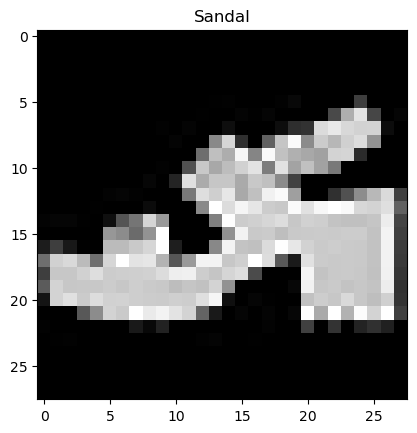

In [188]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [189]:
#make predictions
pred_probs = make_predictions(
    model=model,
    data=test_samples
)
pred_probs

tensor([[3.1467e-08, 1.7173e-08, 1.0622e-08, 5.4573e-09, 7.5147e-09, 8.8315e-01,
         5.1418e-08, 3.1476e-04, 1.5431e-05, 1.1652e-01],
        [6.3435e-02, 5.8657e-03, 3.6713e-03, 8.4507e-01, 6.9434e-02, 4.6881e-07,
         1.1578e-02, 5.3464e-06, 9.3985e-04, 1.6135e-06],
        [9.3678e-08, 2.5770e-08, 1.2593e-07, 3.7697e-07, 1.2052e-07, 1.1867e-02,
         3.5927e-07, 3.8541e-01, 1.6994e-02, 5.8573e-01],
        [6.5489e-04, 7.0353e-04, 7.0921e-02, 5.9425e-04, 9.2480e-01, 1.8485e-11,
         2.1330e-03, 1.0127e-09, 1.9662e-04, 1.0522e-10],
        [1.3991e-02, 4.4335e-04, 3.9026e-05, 9.8247e-01, 1.5785e-04, 7.3894e-09,
         2.7559e-03, 3.6585e-05, 6.9177e-05, 3.4845e-05],
        [8.9837e-01, 2.5512e-04, 1.7994e-03, 8.9520e-03, 3.3694e-03, 6.6475e-10,
         8.7185e-02, 1.7904e-08, 7.0298e-05, 7.7512e-09],
        [4.6596e-05, 8.0103e-05, 1.0746e-02, 2.3995e-05, 9.8081e-01, 1.1637e-08,
         8.2541e-03, 5.0510e-10, 3.9717e-05, 6.8873e-11],
        [2.0506e-05, 4.3338

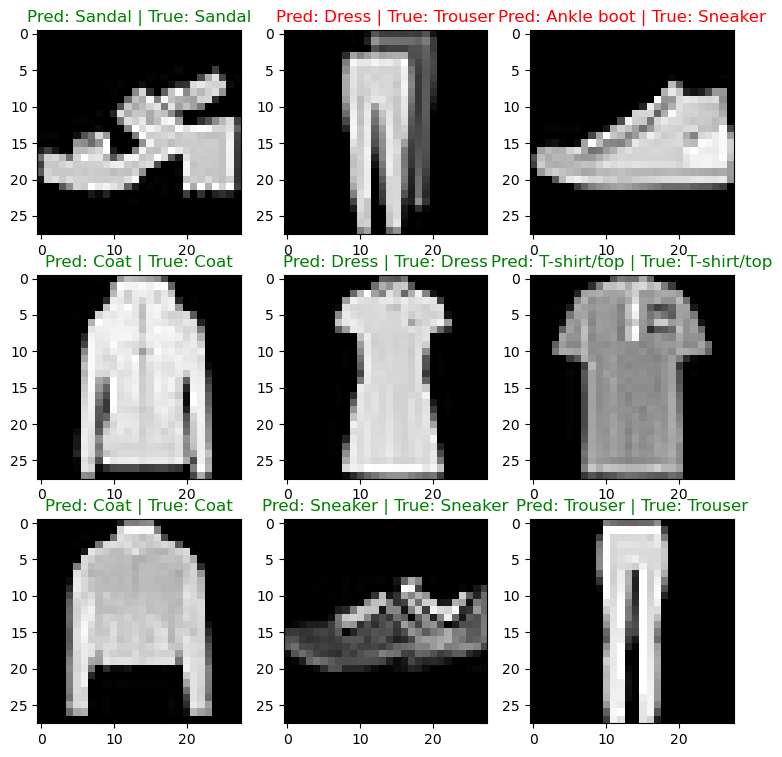

In [192]:
#plot predictions
plt.figure(figsize=(9,9))
nrows,ncols = 3,3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    pred_label = class_names[pred_probs[i].argmax().item()]  # Fixed: Use pred_probs to get predicted class
    true_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | True: {true_label}"
    if pred_label == true_label:  # Fixed: Compare pred_label with true_label
        plt.title(title_text, color="green")
    else:
        plt.title(title_text, color="red")
       

In [194]:
#make confusion matrix for further prediction evaluation
y_pred=[]
model.eval()
with torch.inference_mode():
    for x,y in test_loader:
        x,y = x.to(device), y.to(device)
        y_logits = model(x)
        y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
print(y_pred)

tensor([3, 1, 7, 5, 8, 4, 5, 0, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')


In [199]:
import torchmetrics
print(torchmetrics.__version__)
import mlxtend
mlxtend.__version__

1.7.1


'0.23.4'

In [219]:
from torchmetrics.classification import ConfusionMatrix

all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

# Convert to tensors
all_preds_tensor = torch.tensor(all_preds)
all_targets_tensor = torch.tensor(all_targets)

# Compute confusion matrix
cmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
cmat_tensor = cmat(all_preds_tensor, all_targets_tensor)
cmat_tensor

tensor([[873,   1,  11,  43,   7,   3,  43,   0,  19,   0],
        [  5, 952,   2,  31,   6,   0,   2,   0,   2,   0],
        [ 43,   3, 611,  11, 229,   1,  83,   0,  19,   0],
        [ 45,   8,   3, 876,  36,   2,  25,   0,   5,   0],
        [  0,   1,  50,  36, 854,   1,  49,   0,   9,   0],
        [  0,   0,   0,   1,   0, 951,   0,  25,   7,  16],
        [232,   1,  87,  35, 187,   1, 420,   0,  37,   0],
        [  0,   0,   0,   0,   0,  77,   0, 870,   0,  53],
        [  2,   1,   1,   8,   4,   3,   4,   4, 973,   0],
        [  0,   0,   0,   0,   0,  27,   0,  25,   2, 946]])

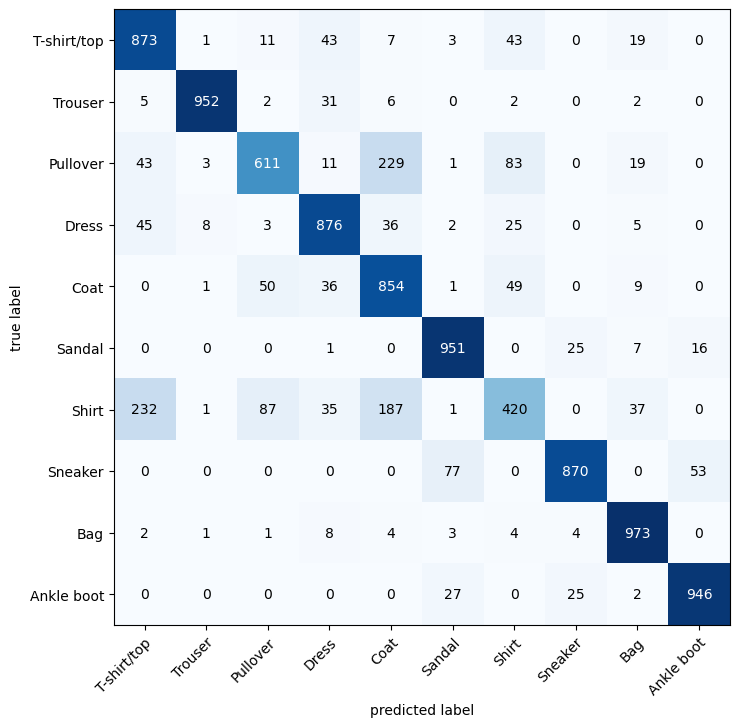

In [224]:
fig,ax = plot_confusion_matrix(
    conf_mat=cmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,8),
   
)